In [3]:
import os
import random
import pandas as pd
import numpy as np
from datetime import timedelta
import pandapower as pp
import pandapower.networks as pn
import pandapower.plotting as plot
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

matplotlib.rcParams["timezone"] = "Europe/Berlin"

import data_process_base
import importlib
importlib.reload(data_process_base)

try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

In [2]:
# create random time series from import data
da = data_process_base.DataAction()
nc = data_process_base.net_calc()

da.folder_path = r"G:\\My Drive\\docs\\Education\\University\\ALUF\\SSE\\6 sem\\Bachelor Thesis\\data\\"
keep_cols = ['DE_KN_residential1_grid_import',
             'DE_KN_residential2_grid_import',
             'utc_timestamp']
da.imp_procc("house_data.csv", keep_cols)

Number of data frame segments =  90
dfList created successfully.


In [35]:
net = pn.ieee_european_lv_asymmetric('off_peak_1440')
pp.create_sgen(net, 6, p_mw=0, name="sgen_1", q_mvar=0)
pp.create_load(net, 34, p_mw=1, name="bruh", q_mvar=0)
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,bruh,34,1.0,0.0,0.0,0.0,NaN,1.0,True,wye





100%|██████████| 2/2 [00:00<00:00, 86.88it/s]


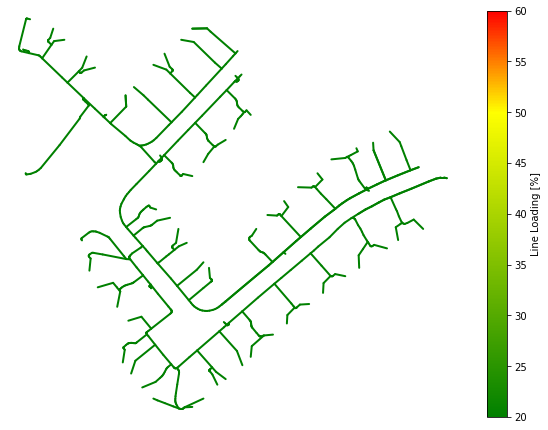

In [36]:
nc.load_graph(net, time_step=1)

In [28]:
# net.asymmetric_load